## statsmodels的time series analysis(tsa)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import statsmodels.api as sm

# print(sm.datasets.macrodata.NOTE)   # 查看这个内置数据集的description
df = sm.datasets.macrodata.load_pandas().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### sm.tsa.datetools.dates_from_range


### Set the time period as the index



In [ ]:
# 处理时序的数据集都先把日期设为index
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))  # Q是quarter
df.index = index
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0, 0.5, 'REAL GDP')

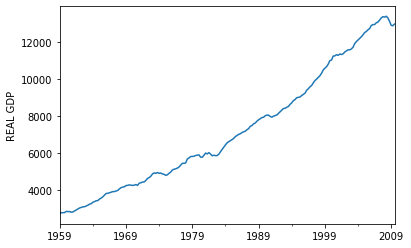

In [ ]:
df['realgdp'].plot()
plt.ylabel("REAL GDP")

### sm.tsa.filters.hpfilter

### Use Hodrick-Prescott filter to get the trend
宏观研究会注重“经济周期”，HPfilter是分离所谓“长期趋势”和“短期周期”的一种手段。

#### Seasonality: repeating trends

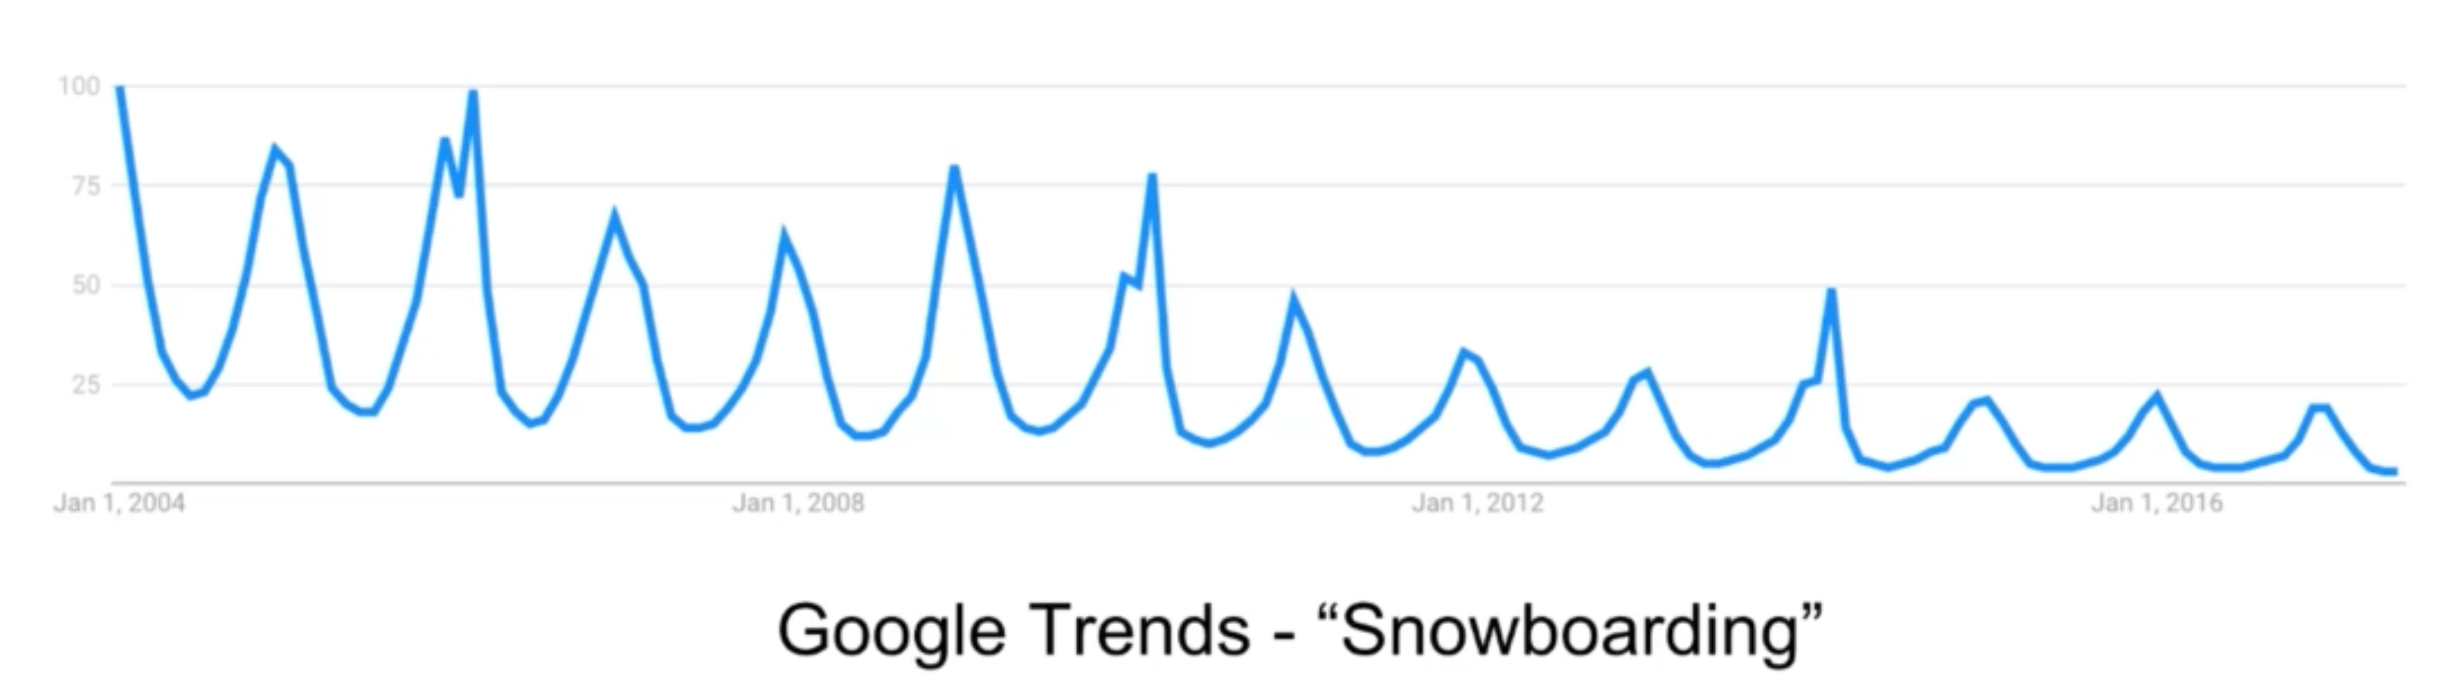



#### Cyclical： trends with no set repetition

you can see there's clearly a trend here but we can't actually pinpoint the season itself

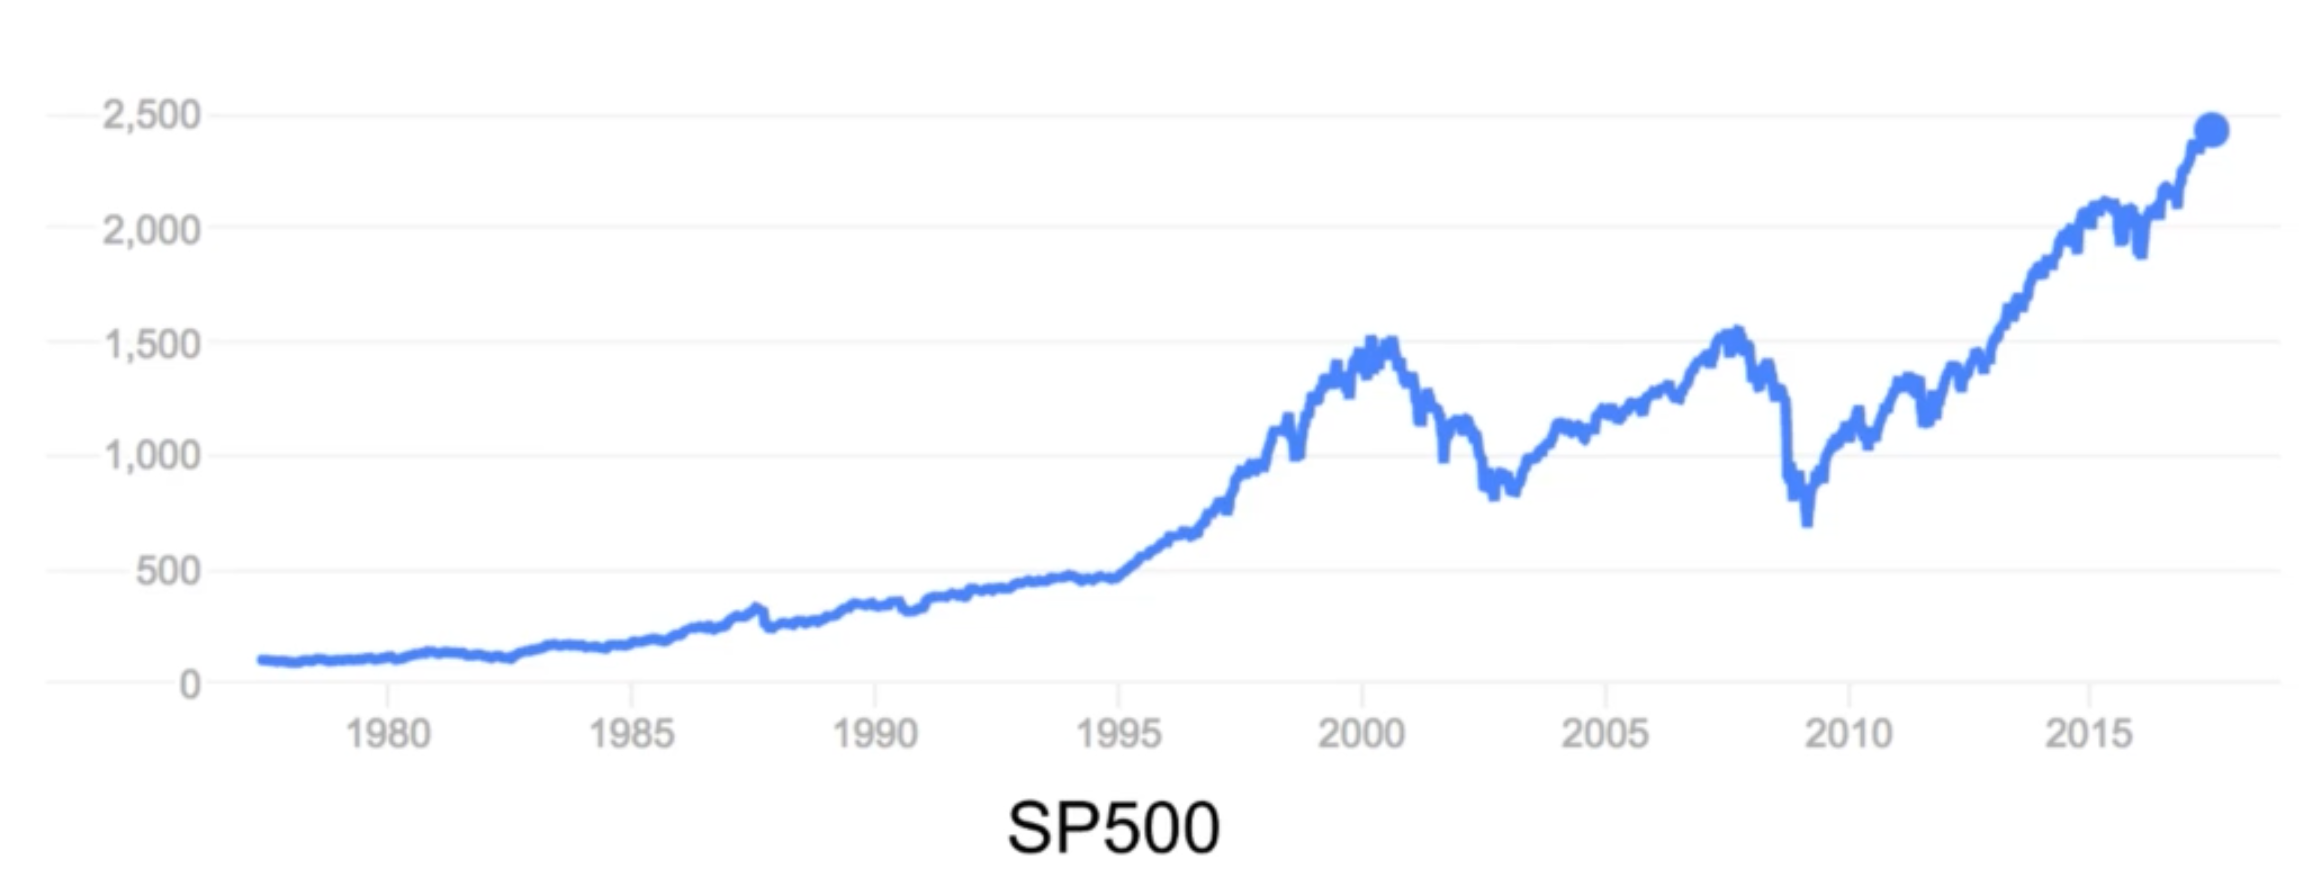

但是这个方法被质疑了

The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

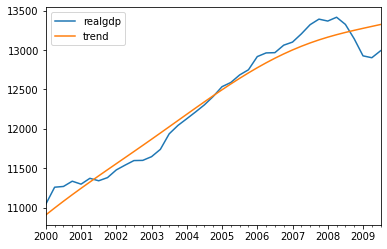

In [ ]:
# Tuple unpacking
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])    

df['trend'] = gdp_trend
df[['realgdp', 'trend']]["2000-03-31":].plot()  # the date is used to zoom the plot

### Time series decomposition with ETS(Error-Trend-Seasonality)

ETS models will take each of those terms for "smoothing" purposes and may add them multiply them, or even just leave some of them out.

A time series dataset will be broken down into several terms: an error term, a trend term and a seasonality term and based off these key factors we can try to create a model to fit our data.

作用：ETS is a good way to build an understanding of its behaviour.

### EWMA(Expoentially Weighted Moving Averages) Models

use moving averages to create a simple model that describe some trend level behavior of a time series

Why use EWMA instead of SMA(simple moving averages就之前那个MA50 MA100那个)?

- The weakness of SMA: smaller windows will lead to more noise, rather than signal.

- EWMA will allow us to reduce the lag effect from SMA and it'll put more weight on values that occurred more recently by applying more weight to the more recent values.(就是说MA10就只是滑动某个值最近10天(window size)的平均值，每个日子的权重一样，但是RWMA会给最近的几天的值加权，比如这十天里离这个值最近的两天权比剩下6天的权要大。